In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

## __Business Problem__  
Prepare rules for the all the data sets  
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values  
2) Change the minimum length in apriori algorithm  
3) Visulize the obtained rules using different plots

## __Data collection and description__ 

In [2]:
df = pd.read_csv("data/book.csv")

In [3]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df1 = df.copy()

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [6]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
df1.shape

(2000, 11)

In [9]:
item_sets = {}

In [10]:
te = TransactionEncoder()

In [11]:
te_ary = te.fit(df1).transform(df1)

In [12]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

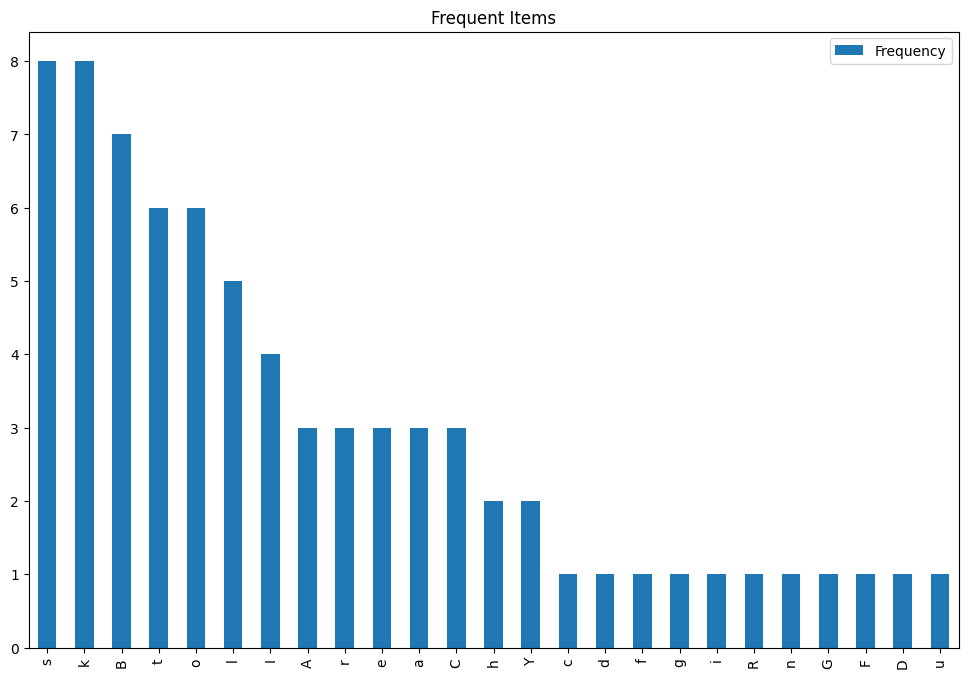

In [13]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar', figsize=(12,8), title="Frequent Items")
plt.show()

## __Apriori algorithm__ 

In [14]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [15]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [16]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [17]:
confs = []

In [18]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

In [19]:
all_conf = pd.concat(confs,axis=1)

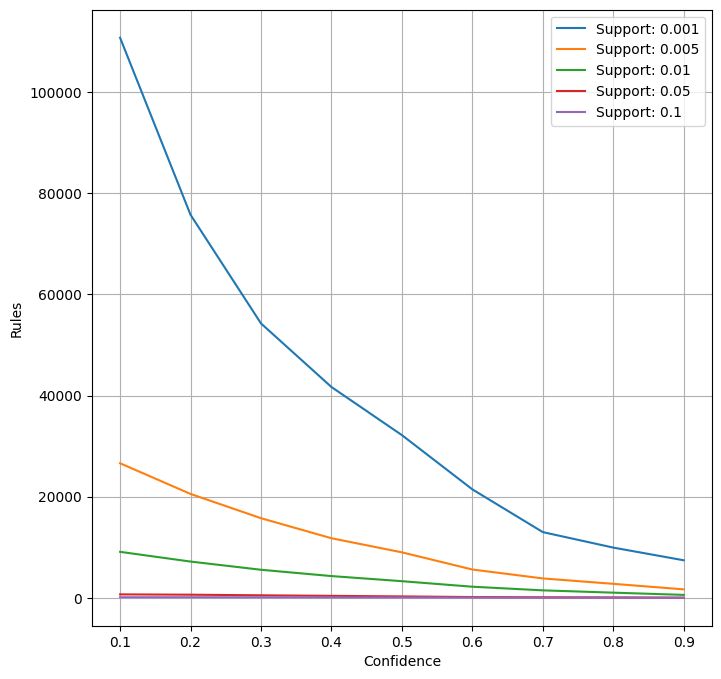

In [20]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

## __Conclusiom__ 

As shown in above graph
1.	Lower the Confidence level Higher the no. of rules.
3.	Higher the Support, lower the no. of rules.

### Lets try with Support 0.01 and Confidence at 0.4

In [21]:
ap_final =  apriori(ap,0.001,True)

In [22]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [23]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
740,"(Y, t)","(k, o, B, s)",0.0010,0.0020,0.001,1.000000,500.000000,0.000998,inf
743,"(o, Y)","(k, B, s, t)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf
745,"(k, Y)","(o, B, s, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
746,"(Y, s)","(k, o, B, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf


In [24]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

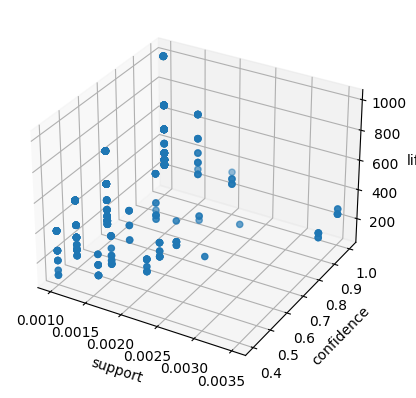

In [25]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

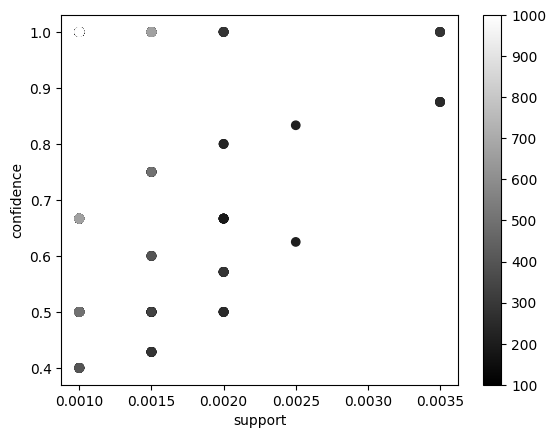

In [26]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")